<a href="https://colab.research.google.com/github/anamanuellar/modelo-classificacao/blob/main/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# **Dataset Iris**

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Análise Exploratória**

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<ipython-input-32-9c76d16c7cf3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='pastel')


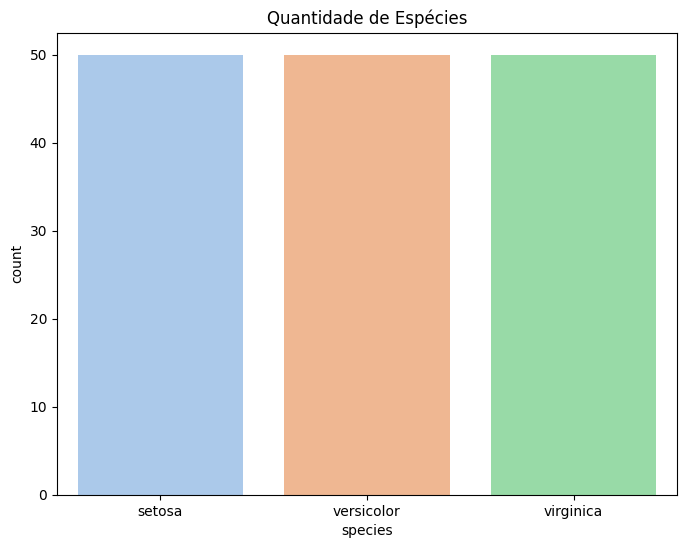

In [ ]:
# Mapeando os rótulos numéricos para os nomes das espécies
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
# Plotando a contagem das espécies
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df, palette='pastel')
plt.title("Quantidade de Espécies")
plt.show()

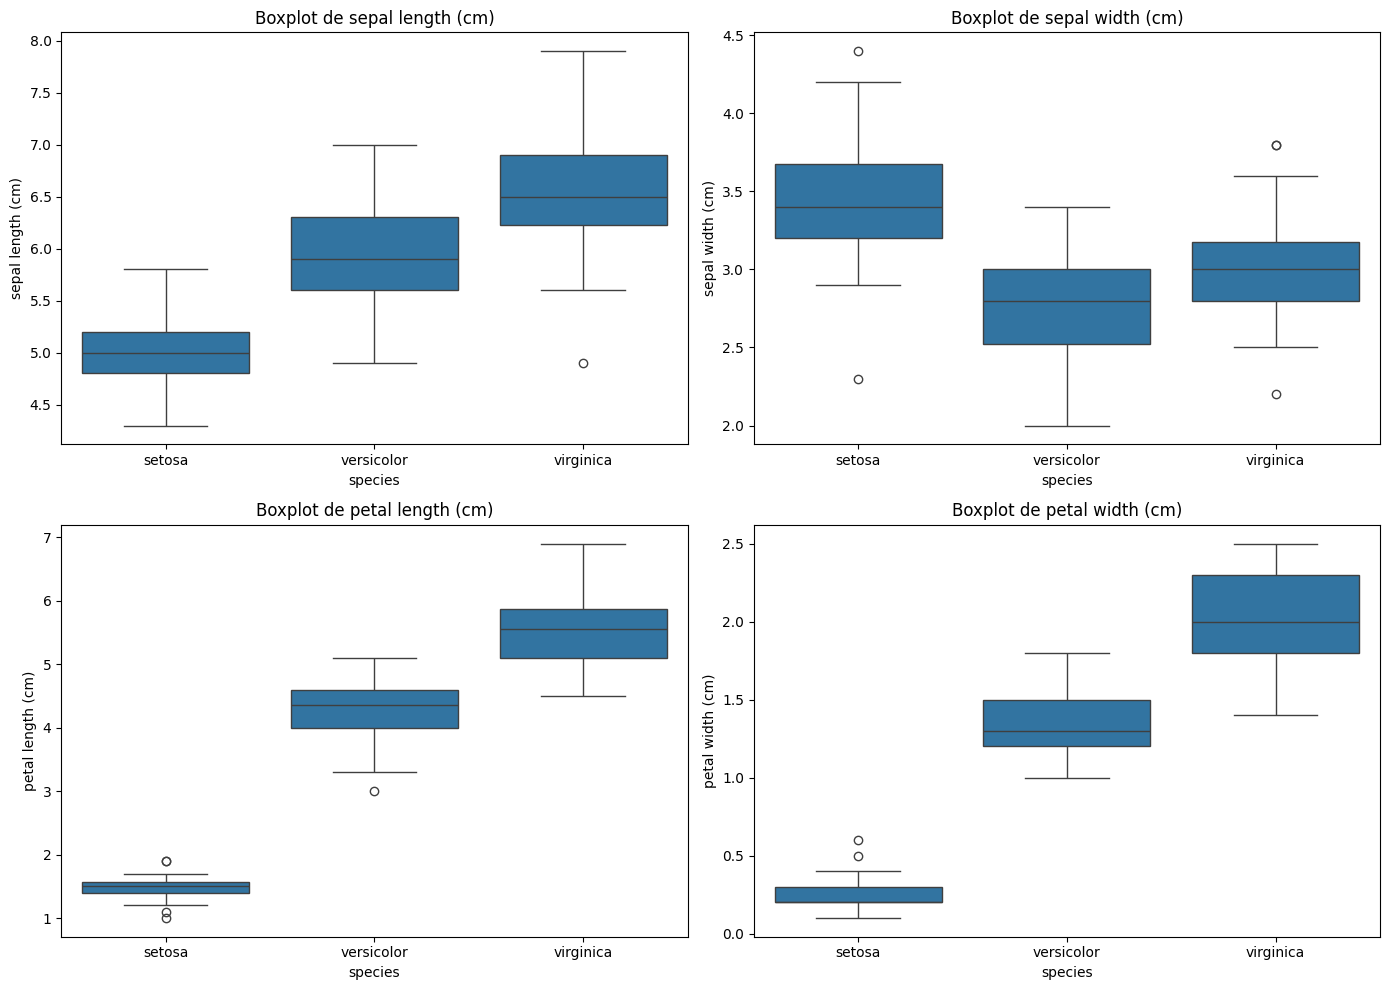

In [ ]:
#b. Usando o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.


# Boxplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=df)
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

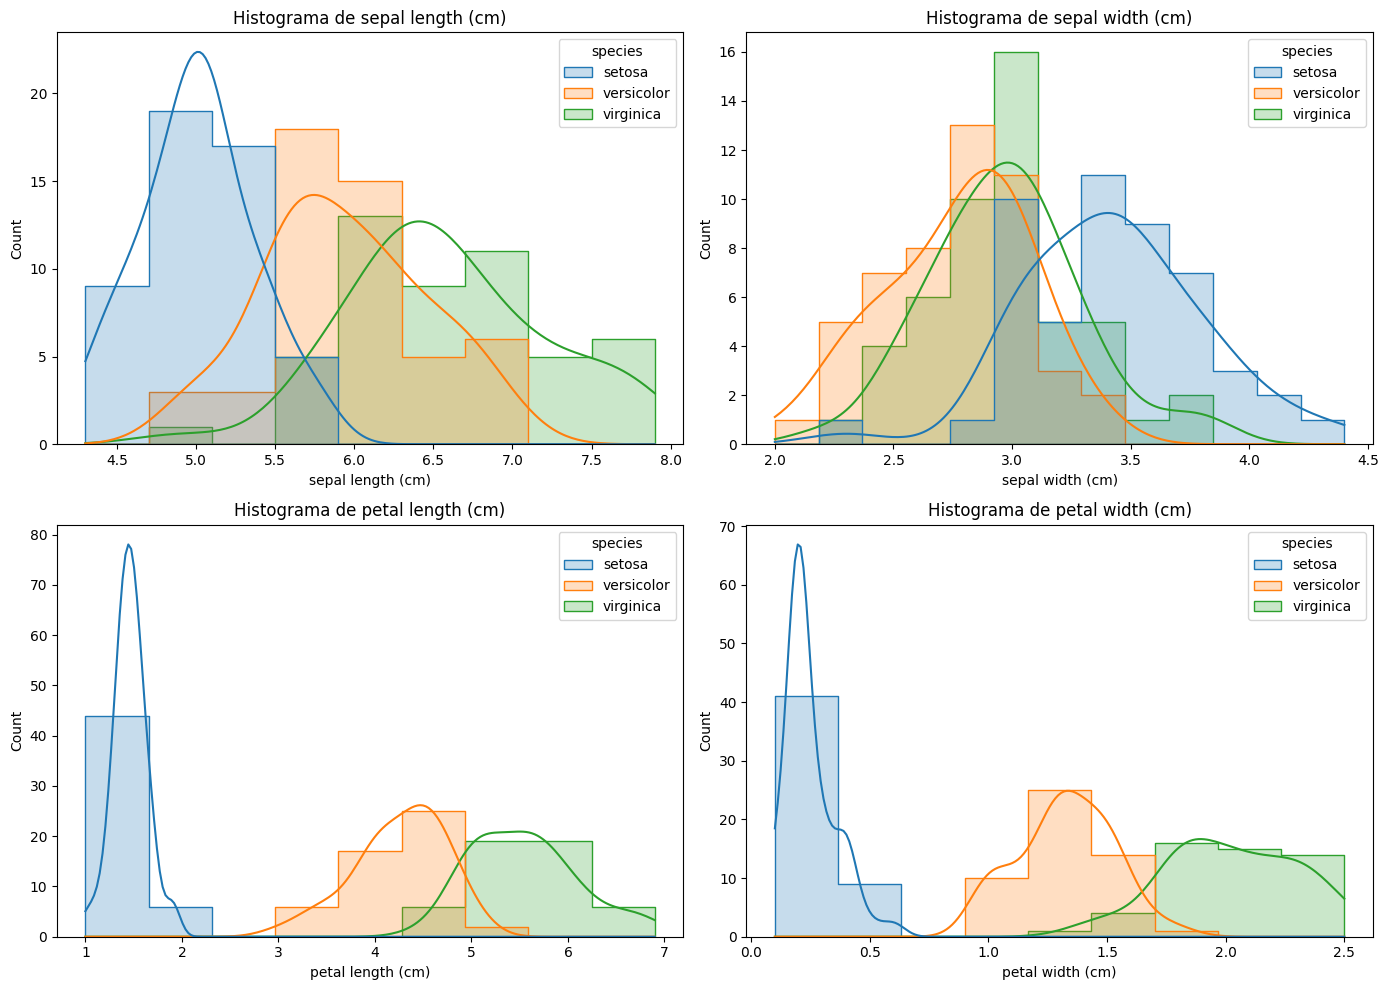

In [ ]:
# Histograma
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=column, hue='species', kde=True, element='step')
    plt.title(f'Histograma de {column}')
plt.tight_layout()
plt.show()

c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?


Ao observar os boxplots e histogramas, é possível notar que:

- Setosa pode ser claramente diferenciada das outras duas espécies pela largura e comprimento das pétalas.
- Versicolor e Virginica têm mais sobreposição, especialmente em características como Sepal Length e Sepal Width, mas ainda podem ser diferenciadas usando Petal Length e Petal Width.

Em resumo, é possível afirmar que a largura da pétala (Petal Length) e comprimento (Petal Width) são características fundamentais para diferenciar as espécies de íris, especialmente para separar a espécie Setosa das outras duas. A largura da sépala (Sepal Length) e comprimento (Sepal Width) são menos eficazes individualmente devido à sobreposição entre Versicolor e Virginica, mas ainda fornecem informações valiosas sobre as diferenças entre as espécies.


In [ ]:
#d. Aplicando a regressão logística para avaliar o modelo de classificação.

# Dividindo os dados em conjunto de treinamento e teste
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de regressão logística
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

In [ ]:
#e. Calculando a acurácia, precisão e recall.

# Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Precisão e Recall (média macro para todas as classes)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00


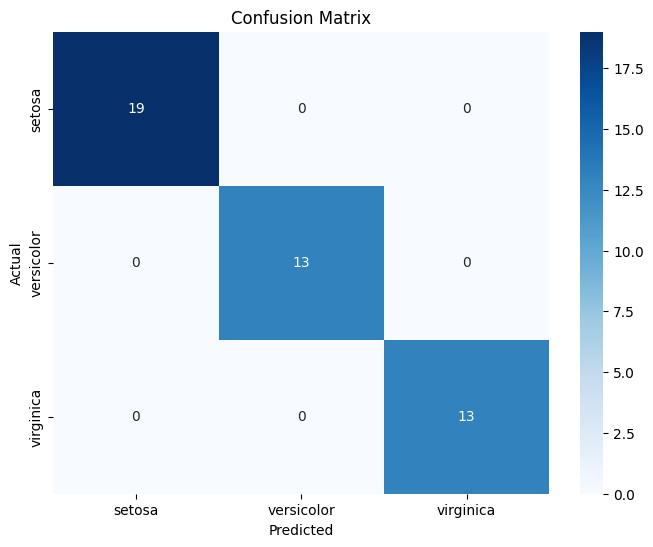

In [ ]:
#f. Plotando a matriz de confusao com matplotlib ou seaborn

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Os resultados indicam um desempenho perfeito do modelo na classificação do dataset Iris, com acurácia, precisão e recall de 1.00, o que significa que todas as amostras foram corretamente classificadas. Isso é verificado pela matriz de confusão, que mostra valores corretos apenas nas diagonais, sem erros de classificação.